In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [75]:
start = '2012-01-01'
end = '2024-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [76]:
data.reset_index(inplace=True)

In [77]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
3013,2023-12-22,142.370361,142.720001,143.250000,142.054993,142.130005,18494700
3014,2023-12-26,142.470123,142.820007,143.945007,142.500000,142.979996,11170100
3015,2023-12-27,141.093506,141.440002,143.320007,141.050995,142.830002,17288400


In [78]:
ma_50_days = data.Close.rolling(50).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

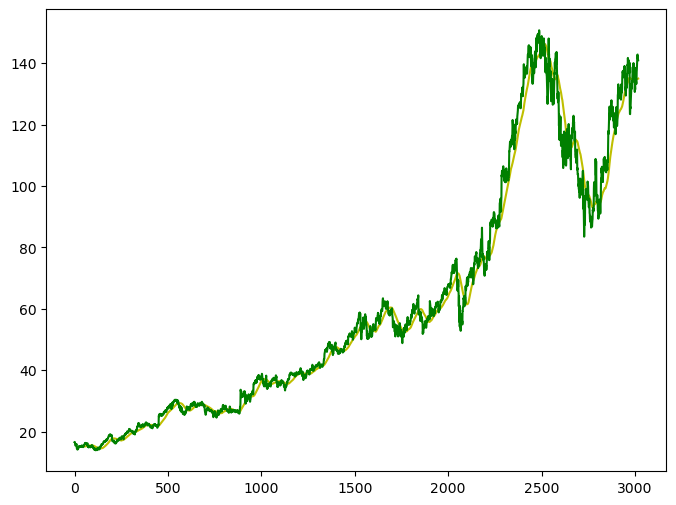

In [79]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'y')
plt.plot(data.Close, 'g' )
plt.show

In [80]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

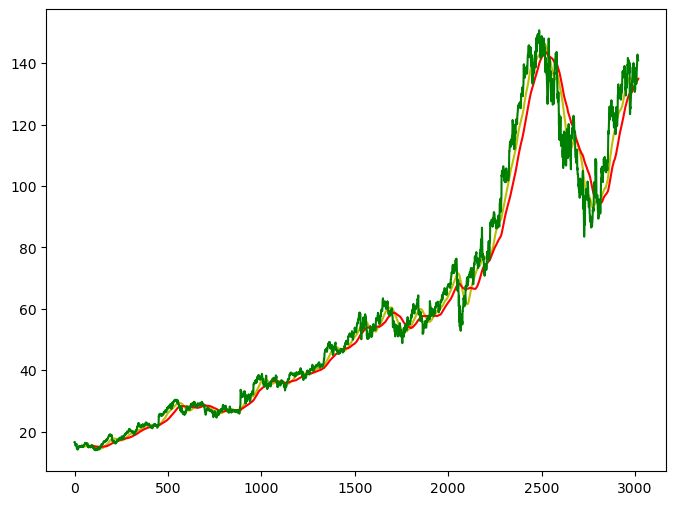

In [81]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'y')
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g' )
plt.show


In [82]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

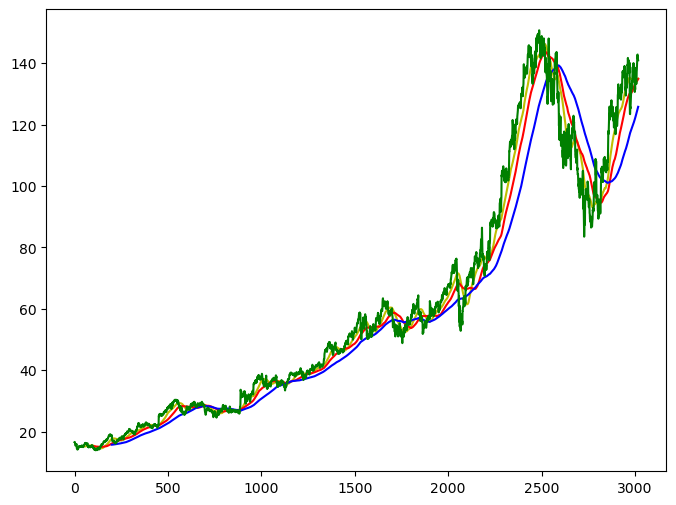

In [83]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'y')
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g' )
plt.show

In [84]:
data.dropna(inplace=True)

In [85]:
train_data = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
test_data = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [86]:

train_data.shape[0],test_data.shape[0]

(2414, 604)

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))

In [88]:
train_data_scale = scaler.fit_transform(train_data)

In [89]:
x = []
y = []

for i in range (100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100:i])
    y.append(train_data_scale[i,0])

In [90]:
x, y =np.array(x), np.array(y)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [92]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\dkara\AppData\Local\Programs\anaconda3\envs\TF\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x, y, epochs = 50, batch_size = 32, verbose =1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 0.0416
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0042
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0031
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0031
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0034
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0028
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0026
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0027
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0031
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0023
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0020
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0023
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0019
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0016
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/

In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [95]:
pas_100_days = train_data.tail(100)

In [96]:
test_data = pd.concat([pas_100_days, test_data], ignore_index=True)

In [97]:
test_data

Ticker,GOOG
0,104.625999
1,104.554001
2,101.810997
3,102.160004
4,101.929497
...,...
699,142.720001
700,142.820007
701,141.440002
702,141.279999


In [100]:
test_data_scale = scaler.fit_transform(test_data)

In [101]:
x = []
y = []

for i in range (100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100:i])
    y.append(test_data_scale[i,0]) 

In [102]:
x, y =np.array(x), np.array(y)

In [103]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [104]:
y_predict

array([[0.742717  ],
       [0.7432827 ],
       [0.74419206],
       [0.7459359 ],
       [0.7484843 ],
       [0.75179183],
       [0.7556635 ],
       [0.759964  ],
       [0.7639789 ],
       [0.76694244],
       [0.768617  ],
       [0.7695644 ],
       [0.771173  ],
       [0.7746988 ],
       [0.7806737 ],
       [0.78848547],
       [0.7978369 ],
       [0.8083779 ],
       [0.81938857],
       [0.83010936],
       [0.8393303 ],
       [0.8464491 ],
       [0.85157764],
       [0.85487723],
       [0.856662  ],
       [0.85651314],
       [0.8548147 ],
       [0.8522372 ],
       [0.8499805 ],
       [0.8487052 ],
       [0.8478146 ],
       [0.8460814 ],
       [0.8430917 ],
       [0.83939683],
       [0.83601236],
       [0.8339582 ],
       [0.8334042 ],
       [0.83261114],
       [0.82989395],
       [0.8243451 ],
       [0.8168974 ],
       [0.8081946 ],
       [0.7995765 ],
       [0.7925528 ],
       [0.7885197 ],
       [0.78821504],
       [0.7910479 ],
       [0.795

In [108]:
scale = 1/scaler.scale_

In [109]:
y_predict = y_predict * scale

In [110]:
y = y * scale

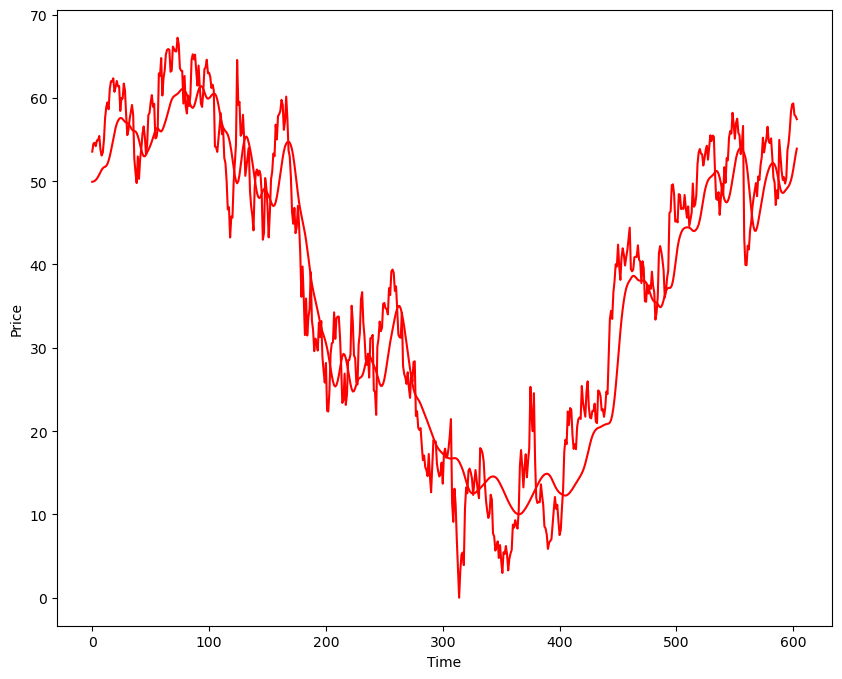

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()